In [1]:
from IPython.display import clear_output
import pdb, time, math, numpy as np, gc, importlib, torch, os, cv2 as cv
import matplotlib.pyplot as plt
from torch import Tensor, nn
from torch.nn import functional as F 
from torch.autograd import Variable
from torch.distributions import MultivariateNormal
from torchdiffeq import odeint_adjoint as odeint
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import Utils, ODEModel, LearnTraj
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory, ezshow, SaveTrajectory as st
importlib.reload(ODEModel)
from ODEModel import ODEfunc, coordMLP, FfjordModel
importlib.reload(LearnTraj);
from LearnTraj import learn_trajectory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

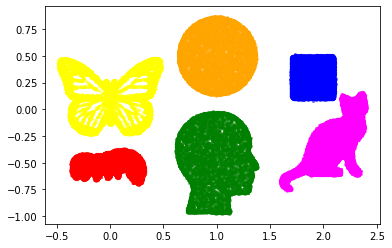

In [2]:
im1 = ImageDataset('frames/butterfly.jpg'); 
im1b = ImageDataset('frames/butterflyfilled.jpg'); 
im2 = ImageDataset('frames/caterpillar.png', noise_std = .005); 
im3 = ImageDataset('frames/circle.jpeg'); 
im4 = ImageDataset('frames/baldhead.jpeg'); 
im5 = ImageDataset('frames/square.png'); 
im6 = ImageDataset('frames/cat1.png'); 

n_inner = 5000;
n_sil = 10000 - n_inner;
d2 = im2.sample(n_inner, n_sil, scale = [-1, -1], center = [0.05, -.5]); 
d1a = im1.sample(n_inner, n_sil, center = [0, 0]); 
d1b = im1b.sample(n_inner, n_sil, center = [0, 0]); 
d3 = im3.sample(n_inner, n_sil, center = [1, .5]); 
d4 = im4.sample(n_inner, n_sil, center = [1, -.5]); 
d5 = im5.sample(n_inner, n_sil, center = [1.9, .3]); 
d6 = im6.sample(n_inner, n_sil, center = [2, -.3]); 

dat1 = torch.cat((d1a[0], d1b[1]),0)
dat2 = torch.cat(d2,0)
dat3 = torch.cat(d3,0)
dat4 = torch.cat(d4,0)
dat5 = torch.cat(d5,0)
dat6 = torch.cat(d6,0)

ezshow(dat1, col='yellow')
ezshow(dat2, col='red')
ezshow(dat3, col='orange')
ezshow(dat4, col='green')
ezshow(dat5, col='blue')
ezshow(dat6, col='magenta')

0 lr 0.0001
batch 0 loss tensor(1.5000, device='cuda:0', grad_fn=<AddBackward0>)


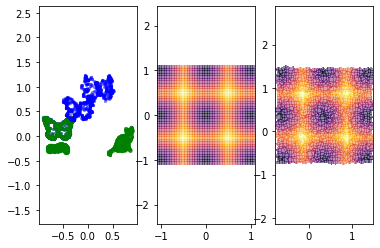

time elapsed 0.8337211608886719 total time 0.833721399307251
batch number 0 out of 1000
savetime 4.76837158203125e-07
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 n_subsample 630
lr 0.0001
batch 50 loss tensor(0.1117, device='cuda:0', grad_fn=<AddBackward0>)


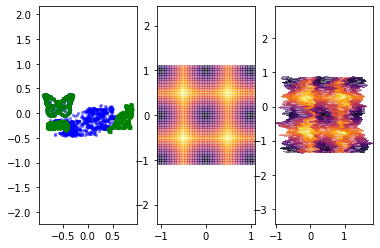

time elapsed 18.914522409439087 total time 19.822452068328857
batch number 50 out of 1000
savetime 1.5928430557250977
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 n_subsample 794
lr 0.0001
batch 100 loss tensor(0.0444, device='cuda:0', grad_fn=<AddBackward0>)


<Figure size 432x288 with 0 Axes>

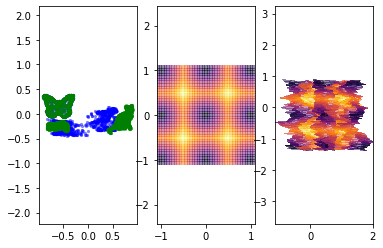

time elapsed 23.053738594055176 total time 44.46976828575134
batch number 100 out of 1000
savetime 1.5388875007629395
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 n_subsample 1000
lr 0.0001
batch 150 loss tensor(0.0245, device='cuda:0', grad_fn=<AddBackward0>)


<Figure size 432x288 with 0 Axes>

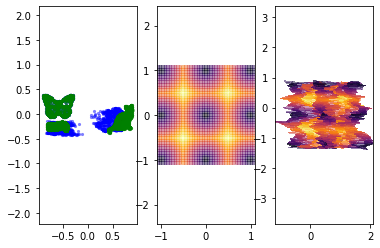

time elapsed 28.08694553375244 total time 74.0963945388794
batch number 150 out of 1000
savetime 1.6347079277038574
151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 

In [ ]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));
sigmac = 20; n_freq = 512; tdiv = 6
model = coordMLP(sigmac = sigmac, n_freq = n_freq, hidden_layers=3, hidden_features=512, tdiv = tdiv).to(device); 
# model.load_state('models/state_1950.tar');
# %prun 
model, losses, separate_losses, lrs, n_subs = learn_trajectory(keyframes, n_iters = 1000,n_subsample=500, model=model, save=True)

In [13]:
# st.gpu_usage()
# z_target.shape
# z_target = ImageDataset.normalize_samples(torch.stack((dat2, dat1)).to(device));

# torch.cuda.empty_cache()
# z_target = ImageDataset.normalize_samples(torch.stack((dat2, dat1)).to(device));
# model = FfjordModel().to(device); model.load_state('models/state_start.tar'); # print(next(model.parameters()).is_cuda)
# my_loss = 'sinkhorn_large_reg';
myln = 'fit_0';
subsample_inds = torch.randperm(keyframes.shape[1])[:4000];
st.save_trajectory(model,keyframes[:,subsample_inds,:],myln, savedir='imgs', nsteps=40, memory=0.01, n=500,dpiv=400)
st.gpu_usage()
st.trajectory_to_video(myln, savedir='imgs', mp4_fn='transform.mp4')

# integration_times = torch.linspace(0,z_target.shape[0]-1,2).to(device);
# model(z_target[1,:,:], integration_times)


Allocated: 0.19 GB  Reserved: 4.3 GB


<Figure size 432x288 with 0 Axes>

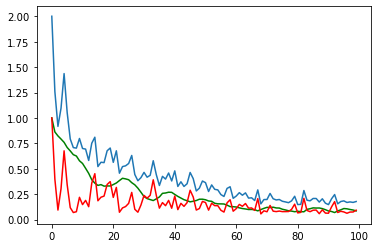

In [165]:
start=0;end=20000;
plt.plot(losses[start:end]); 
plt.plot(separate_losses[0,start:end],'g'); 
plt.plot(separate_losses[1,start:end],'r'); 
# plt.plot(separate_losses[2,start:end]); 
# plt.plot(separate_losses[3,start:end]*.01,'r'); 
# plt.plot(separate_losses[4,start:end]*10,'b'); 
# plt.plot(separate_losses[5,start:end]); 
# plt.plot(separate_losses[6,start:end]);
plt.savefig(os.path.join('./', f"viz_loss.jpg"),dpi=400); 

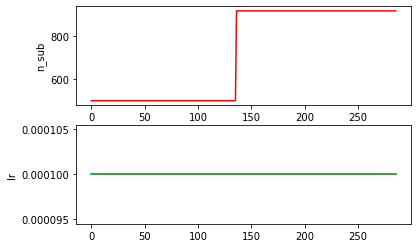

In [20]:
(fig,(ax1,ax2))=plt.subplots(2,1)
ax1.plot(n_subs[start:end],'r'); ax1.set_ylabel('n_sub')
ax2.plot(lrs[start:end],'g'); ax2.set_ylabel('lr') 
plt.savefig(os.path.join('./', f"viz_stat.jpg"),dpi=400); 

In [ ]:
torch.cuda.empty_cache() 
st.gpu_usage()

In [ ]:
name = 'cat1.png'
# # name = 'butterfly.jpg'
img = cv.imread(name, cv.IMREAD_UNCHANGED);
imggray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape)
print(imggray.shape)

edges = cv.Canny(img,50,200)
# print(img.min(),img.max())
# print(edges.min(),edges.max())
plt.imshow(imggray);plt.show()
plt.imshow(img);plt.show()
plt.imshow(edges);plt.show()
# i2 = img.copy()

# img = cv.imread(name);
# img[img<.8*255]=0; 
# # img/=img.max()
# img=img.astype('float')
# img/=img.max()
# img.shape

print(img.min(),img.max())
print(imggray.min(),imggray.max())

In [ ]:
# test what weights are given to what frequencies in the first layer
for param in model.parameters():
    print(type(param.data), param.size())
    pdat = param.data;
    break;    
pmags = torch.norm(param.data,p=2,dim=0);
freqs = model.time_deriv_func.imap.B;
nf = freqs.shape[0];
nd = (pmags.shape[0]-2*nf)

fmags = torch.norm(freqs,p=2,dim=1);
xyfreqs = torch.cat([fmags, fmags],dim=0);
print(xyfreqs.size())

plt.plot(xyfreqs.cpu().numpy(), pmags[0:(nf*2)].cpu().numpy(),'.')
plt.plot(np.zeros(nd), pmags[(nf*2):].cpu().numpy(),'.')
plt.savefig(os.path.join('./', f"viz_freqs.jpg"),dpi=400); 
# # freqs
# # fmags

In [ ]:
## visualize ending sinkhorn costs as gradient on point clouds
# z_target = ImageDataset.normalize_samples(torch.stack((dat1,dat4)).to(device));
T = z_target.shape[0];

z_t = model(z_target[0,:,:], integration_times = torch.linspace(0,T-1,T).to(device),reverse=False);
z_t_b = model(z_target[T-1,:,:], integration_times = torch.linspace(0,T-1,T).to(device),reverse=True);
forward = z_t[T-1,:,:].cpu().detach().numpy();
backward = z_t_b[T-1,:,:].cpu().detach().numpy();

my_loss_f = SamplesLoss("sinkhorn", p=2, blur=0.01);
loss_f = my_loss_f(z_target[T-1,:,:], z_t[T-1,:,:])
loss_b = my_loss_f(z_target[0,:,:], z_t_b[T-1,:,:])

graddirs_f = torch.autograd.grad(loss_f, z_t)[0][T-1,:,:]
graddirs_b = torch.autograd.grad(loss_b, z_t_b)[0][T-1,:,:]

pos_f = z_t.cpu().detach().numpy()
pos_b = z_t_b.cpu().detach().numpy()
dirs_f = graddirs_f.cpu().detach().numpy()
dirs_b = graddirs_b.cpu().detach().numpy()

import os
plt.axis('equal')
plt.scatter(pos_b[0,:,0], pos_b[0,:,1], s=10, alpha=.5, linewidths=0, c='green', edgecolors='black')
plt.scatter(forward[:,0], forward[:,1], s=10, alpha=.5, linewidths=0, c='red', edgecolors='black')
plt.quiver(pos_f[T-1,:,0], pos_f[T-1,:,1], dirs_f[:,0], dirs_f[:,1],scale=.0001)
plt.savefig(os.path.join('./', f"viz_backward.jpg"),dpi=400); plt.clf()

plt.axis('equal')
plt.scatter(pos_f[0,:,0], pos_f[0,:,1], s=10, alpha=.5, linewidths=0, c='green', edgecolors='black')
plt.scatter(backward[:,0], backward[:,1], s=10, alpha=.5, linewidths=0, c='red', edgecolors='black')
plt.quiver(pos_b[T-1,:,0], pos_b[T-1,:,1], dirs_b[:,0], dirs_b[:,1],scale=.0001)
plt.savefig(os.path.join('./', f"viz_forward.jpg"),dpi=400); 


In [ ]:
#trying other shapes

square = np.zeros([20,20])
square[6:14,:8] = 1

two_square = np.zeros([20,20])
two_square[:5,14:] = 1
two_square[15:,14:] = 1


annulus = import_img('annulus.png')
circle = 255-import_img('circle.jpeg')

dset = ImageDataset(img=square)
dset1 = ImageDataset(img=two_square)

n = 500
dat = dset.sample(n)
dat1 = dset1.sample(n)
plt.scatter(dat.detach().numpy()[:,0],dat.detach().numpy()[:,1],s=2.3, alpha=0.1, linewidths=5,c='green')
plt.scatter(dat1.detach().numpy()[:,0],dat1.detach().numpy()[:,1],s=2.3, alpha=0.1, linewidths=5,c='red')
plt.show() 

In [ ]:
# make half moon dataset
import sklearn.datasets

moons, labels = sklearn.datasets.make_moons(n,noise=.1) #generates two half moons
mask = (labels == 0)
one_moon = moons[mask,:] # only keep one moon

def rot_mat(theta0):
    #computes rotation matrix of angle theta
    return np.array([[np.cos(theta0),-np.sin(theta0)],[np.sin(theta0),np.cos(theta0)]])

theta0 = np.pi/2
theta1 = np.pi

rot0 = rot_mat(theta0)
rot1 = rot_mat(theta1)

# apply rotation to the moon
one_moon_rot0 = np.dot(one_moon,rot0)
one_moon_rot1 = np.dot(one_moon,rot1)

In [ ]:
#visualize rotated moons

plt.scatter(one_moon[:,0],one_moon[:,1], color='blue')
plt.scatter(one_moon_rot0[:,0],one_moon_rot0[:,1], color='orange')
plt.scatter(one_moon_rot1[:,0],one_moon_rot1[:,1], color='green')

In [ ]:
# with three timesteps

dat = torch.tensor(one_moon,dtype=torch.float)
dat0 = torch.tensor(one_moon_rot0,dtype=torch.float)
dat1 = torch.tensor(one_moon_rot1,dtype=torch.float)

dat_tuple = (dat,dat0,dat1)
z_target = torch.stack(dat_tuple).to(device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=500)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


In [ ]:
# with two timesteps


dat_tuple = (dat,dat0)
z_target = torch.stack(dat_tuple).to(device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for my_loss in ['sinkhorn_large_reg','sinkhorn_small_reg','energy_dist']:
    model = learn_trajectory(z_target, my_loss=my_loss,n_batch=500)
    save_trajectory(model,z_target,my_loss, savedir='imgs', nsteps=101, memory=0.01, n=1000)
    trajectory_to_video(my_loss)


In [ ]:
losses